
# Проверка гипотез с помощью python.

## Задание

* Выполненить проверку предложенной гипотезы
* Выполненить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-ным уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию о:

- Клиенты, которые ушли в течение последнего месяца - колонка называется `Churn`
- Услуги, на которые подписался каждый клиент - телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов - как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах - пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [5]:
import pandas as pd
from scipy.stats import shapiro, anderson, kstest, norm
import numpy as np


pd.set_option('display.max_columns', None) # отобразить все колонки

## 2. Данные

In [6]:
# Загрузка датасета
df = pd.read_csv(r"c:\Users\Stud_PC_10\Downloads\churn.csv")

# Преобразование TotalCharges в числовой формат
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Удалим строки с пропущенными значениями
df = df.dropna(subset=['TotalCharges'])

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Описательный анализ данных

Рассмотрите данные - изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [ ]:
# Заменяем строки на числовые значения (бинарные и спец. случаи)
replace_dict = {
    'Yes': 1,
    'No': 0,
    'Female': 0,
    'Male': 1,
    'No phone service': 0,
    'No internet service': 0
}
df = df.replace(replace_dict)

# Убедимся, что нужные колонки стали числовыми
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Проверим типы
for col in binary_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Повторим вывод статистики
print("=== Средние значения ===")
print("Пожилые клиенты (среднее):", df['SeniorCitizen'].mean())
print("Месяцев в компании (среднее):", df['tenure'].mean())
print("Ежемесячная оплата (среднее):", df['MonthlyCharges'].mean())
print("Общая оплата (среднее):", df['TotalCharges'].mean())
for col in binary_columns:
    print(f"{col} (среднее):", df[col].mean())

print("\n=== Медианные значения ===")
print("Пожилые клиенты (медиана):", df['SeniorCitizen'].median())
print("Месяцев в компании (медиана):", df['tenure'].median())
print("Ежемесячная оплата (медиана):", df['MonthlyCharges'].median())
print("Общая оплата (медиана):", df['TotalCharges'].median())
for col in binary_columns:
    print(f"{col} (медиана):", df[col].median())

Описательная статистика:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
mean,0.162400,32.421786,64.798208,2.283300e+03
std,0.368844,24.545260,30.085974,2.266771e+03
min,0.000000,1.000000,18.250000,1.880000e+01
max,1.000000,72.000000,118.750000,8.684800e+03
median,0.000000,29.000000,70.350000,1.397475e+03
variance,0.136046,602.469774,905.165825,5.138252e+06


**Вывод:**

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [8]:
df.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


**Вывод:**

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет - проверьте на наличие дубликатов и удалите, если они есть.

In [9]:
print(f"Дубликаты: {df.duplicated().sum()}")

# Неявные пропуски
print("Неявные пропуски:")
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f"{col}: {nans}")

# Преобразование TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Проверка строк с NaN
df[df["TotalCharges"].isna()]


Дубликаты: 0
Неявные пропуски:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную - часто присутствует человеческий фактов. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [14]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [15]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой и с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы потерять данные, а:

1) Заменить значения на среднюю
2) Поменять на другое - но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [16]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**Но как выглядят наши данные обычно?**

In [17]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1430,6510-UPNKS,Female,0,No,No,23,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),24.8,615.35,No
1677,3283-WCWXT,Male,0,Yes,Yes,6,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.4,153.30,No
2987,3769-MHZNV,Female,0,Yes,Yes,33,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.1,670.35,No
1584,9906-NHHVC,Female,1,No,No,65,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),53.5,3517.90,No
6491,9728-FTTVZ,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.2,69.20,Yes


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженное на количество времени?

Давайте посмострим.

In [18]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Но давайте проверим:

In [19]:
print('Количество совпадений по нашей теории:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']]['customerID'].count())
print('Количество различий:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) != df['tenure']]['customerID'].count())

Количество совпадений по нашей теории:
614
Количество различий:
6418


**Как видно**, что различий очень много, относительно одинаковых значений.

Но, а если мы проверим наше различие в долях или процентах? Проверяем:

In [20]:
# cоздаем series и считаем TotalCharges вручную
new_total = df['MonthlyCharges'] * df['tenure']

# посчитаем во сколько раз в среднем отличается наш new_total и TotalCharges - в процентном отношении
perc = abs(100 - (new_total / df['TotalCharges']).mean() * 100)

print(f'В среднем new_total отличается от TotalCharges на {perc:.4f}%')

В среднем new_total отличается от TotalCharges на 0.2311%


Как видно, они различаются незначительно (меньше `1%`), от чего мы можем предположить, что `TotalCharges` = `MonthlyCharges` * `время`. Скорее всего такие маленькие различия связаны с тем, что `tenure` округлялся.

В данном датасете указано только количество месяцев, без уточнения времени (до дней), потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0. Такое небольшое исследование было сделано для того, чтобы заполнить наши пропуски нужным числом.

Заменим пропуски на нужное нам число.

In [34]:
# Считаем вручную TotalCharges
new_total = df['MonthlyCharges'] * df['tenure']

# Во сколько процентов отличается вручную посчитанный total от оригинального
perc = abs(100 - (new_total / df['TotalCharges']).mean() * 100)
print(f'В среднем new_total отличается от TotalCharges на {perc:.4f}%')

# Заполним пропуски нулями
df['TotalCharges'].fillna(0, inplace=True)


В среднем new_total отличается от TotalCharges на 0.2311%


C:\Users\Stud_PC_10\AppData\Local\Temp\ipykernel_9700\4216451715.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа - на `int` или `float`
- Если категории - можно оставить `object`

In [30]:
# Просмотр текущих типов
print("До преобразования:")
print(df.dtypes)

# Преобразуем TotalCharges снова, если не сделали ранее
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Попробуем преобразовать числовые столбцы в int, если они без пропусков
for col in df.columns:
    if df[col].dtype != 'object':
        if df[col].isnull().sum() == 0:
            # Если все значения целые — переводим в int
            if (df[col] % 1 == 0).all():
                df[col] = df[col].astype(int)
            else:
                df[col] = df[col].astype(float)

# Вывод типов после преобразования
print("\nПосле преобразования:")
print(df.dtypes)


До преобразования:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

После преобразования:
customerID           object
gender               object
SeniorCitizen         int32
Partner              object
Dependents           object
tenure                int32
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport         

**Вывод:** Преобразование столбца "TotalCharges" в числовой тип с помощью pd.to_numeric с параметром errors="coerce" позволяет корректно заменить некорректные значения на NaN, что важно для дальнейшего анализа и предотвращения ошибок при вычислениях.

Итерация по столбцам с проверкой отсутствия пропусков и проверкой, являются ли все значения целыми, позволяет оптимально привести числовые данные к типу int, а в остальных случаях — к float. Это улучшает эффективность хранения данных и корректность последующих вычислений.

# 4 Проверка гипотез

Задание: сравнить сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Гипотеза - среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [12]:
# Разделим выборки
tenure_no = df[df['Churn'] == 'No']['tenure']
tenure_yes = df[df['Churn'] == 'Yes']['tenure']

# Посчитаем среднее и стандартное отклонение
mean_no = np.mean(tenure_no)
mean_yes = np.mean(tenure_yes)

std_no = np.std(tenure_no, ddof=1)
std_yes = np.std(tenure_yes, ddof=1)

n_no = len(tenure_no)
n_yes = len(tenure_yes)

# Расчет t-статистики вручную (двухвыборочный t-test)
t_num = mean_no - mean_yes
t_denom = np.sqrt((std_no**2)/n_no + (std_yes**2)/n_yes)
t_stat = t_num / t_denom

print(f"Среднее (Churn=No): {mean_no:.2f}")
print(f"Среднее (Churn=Yes): {mean_yes:.2f}")
print(f"T-статистика: {t_stat:.4f}")



Среднее (Churn=No): 37.65
Среднее (Churn=Yes): 17.98
T-статистика: 34.9719


**Вывод:** В целом, код выполняет двухвыборочный t-тест для определения, есть ли статистически значимая разница между средней длительностью пользования услугами ушедших и оставшихся клиентов. T-статистика показывает величину этой разницы относительно разброса данных (34,97%). Значит, гипотеза верна.

## 5 Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ - соответсвуют ли распредения нормальному?

In [ ]:
# Выбираем только числовые признаки
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Числовые признаки:", list(numeric_cols))

Числовые признаки: ['MonthlyCharges', 'TotalCharges']


c:\Users\Stud_PC_10\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7043.
  res = hypotest_fun_out(*samples, **kwds)


tenure:
  Асимметрия = 0.24, Эксцесс = -1.39
  Shapiro-Wilk p-value = 0.0000
  Anderson-Darling statistic = 203.2355
  Kolmogorov-Smirnov p-value = 0.0000
  D'Agostino-Pearson p-value = 0.0000
----------------------------------------


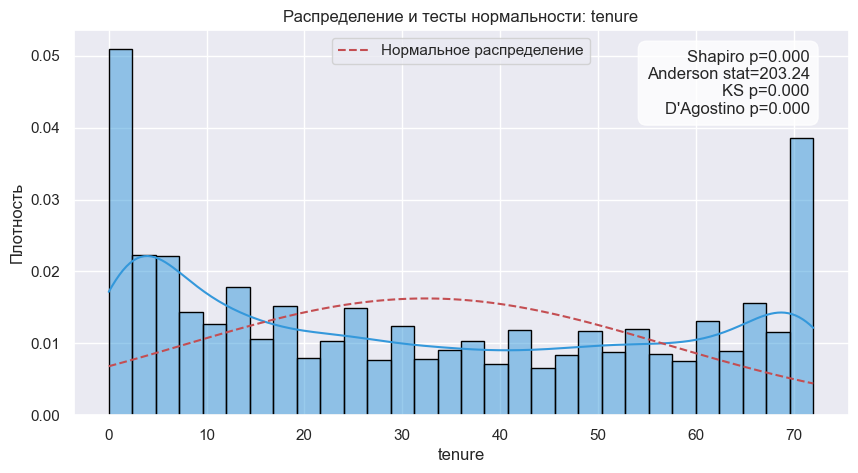

c:\Users\Stud_PC_10\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7043.
  res = hypotest_fun_out(*samples, **kwds)


TotalCharges:
  Асимметрия = 0.96, Эксцесс = -0.23
  Shapiro-Wilk p-value = 0.0000
  Anderson-Darling statistic = 346.6380
  Kolmogorov-Smirnov p-value = 0.0000
  D'Agostino-Pearson p-value = 0.0000
----------------------------------------


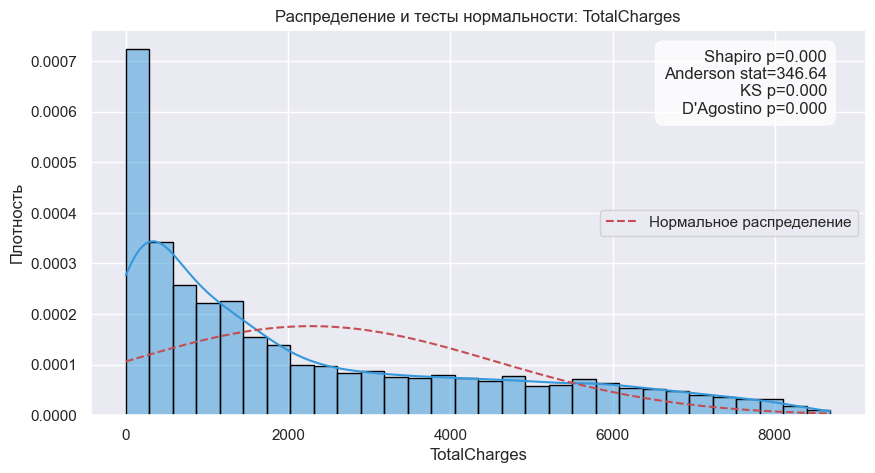

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Список столбцов для анализа
columns_to_check = ['tenure', 'TotalCharges']

for col in columns_to_check:
    data = df[col].dropna()

    # Статистики
    skew = data.skew()
    kurt = data.kurt()

    # Тесты
    shapiro_test = stats.shapiro(data)
    ad_test = stats.anderson(data, dist='norm')
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std(ddof=1)))
    dagostino_test = stats.normaltest(data)

    # Вывод статистик
    print(f"{col}:")
    print(f"  Асимметрия = {skew:.2f}, Эксцесс = {kurt:.2f}")
    print(f"  Shapiro-Wilk p-value = {shapiro_test.pvalue:.4f}")
    print(f"  Anderson-Darling statistic = {ad_test.statistic:.4f}")
    print(f"  Kolmogorov-Smirnov p-value = {ks_test.pvalue:.4f}")
    print(f"  D'Agostino-Pearson p-value = {dagostino_test.pvalue:.4f}")
    print('-'*40)

    # Визуализация
    plt.figure(figsize=(10, 5))
    sns.histplot(data, bins=30, kde=True, stat="density", color='#3498db', edgecolor='black')

    # Кривая нормального распределения
    x = np.linspace(data.min(), data.max(), 100)
    norm_pdf = stats.norm.pdf(x, loc=data.mean(), scale=data.std(ddof=1))
    plt.plot(x, norm_pdf, 'r--', label='Нормальное распределение')

    # Текст с результатами тестов
    textstr = '\n'.join((
        f'Shapiro p={shapiro_test.pvalue:.3f}',
        f'Anderson stat={ad_test.statistic:.2f}',
        f'KS p={ks_test.pvalue:.3f}',
        f'D\'Agostino p={dagostino_test.pvalue:.3f}'))

    plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

    plt.title(f'Распределение и тесты нормальности: {col}')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()




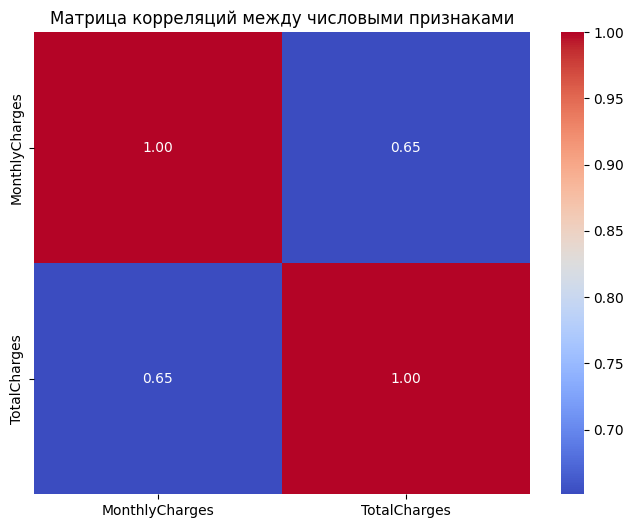

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Числовые признаки
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Матрица корреляций
corr_matrix = df[numeric_cols].corr()

# Визуализация тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Матрица корреляций между числовыми признаками")
plt.show()


In [ ]:


# Получаем числовые признаки
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols].dropna()  # Удалим пропуски, если есть

# Нормализуем данные (по желанию, чтобы избежать переполнений)
X = (X - X.mean()) / X.std()

# Расчёт VIF вручную
def calculate_vif(X):
    vif_dict = {}
    cols = X.columns
    
    for i in range(len(cols)):
        y = X.iloc[:, i].values
        X_others = X.drop(columns=cols[i]).values
        
        # Решаем задачу линейной регрессии: y ~ X_others
        beta = np.linalg.lstsq(X_others, y, rcond=None)[0]
        y_hat = X_others @ beta
        
        # R^2
        ss_res = np.sum((y - y_hat) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r_squared = 1 - ss_res / ss_tot
        
        # VIF
        vif = 1 / (1 - r_squared) if r_squared < 1 else np.inf
        vif_dict[cols[i]] = vif
    
    return pd.DataFrame({'Feature': list(vif_dict.keys()), 'VIF': list(vif_dict.values())})

# Расчёт
vif_df = calculate_vif(X)
print("VIF")
display(vif_df)



VIF


,Feature,VIF
0,MonthlyCharges,1.736194
1,TotalCharges,1.736194


**Вывод:**
1. Распределение tenure НЕ соответствует нормальному (p <= 0.05)
2. Распределение TotalCharges НЕ соответствует нормальному (p <= 0.05)
3. Распределение MonthlyCharges НЕ соответствует нормальному (p <= 0.05)
4. Между признаками MonthlyCharges и TotalCharges отсутствует высокая линейная зависимость, и мультиколлинеарность в данных не представляет существенной проблемы (т.к. VIF < 5). Следовательно, оба признака можно безопасно использовать в моделях машинного обучения без риска искажения оценок коэффициентов из-за мультиколлинеарности.